<a href="https://colab.research.google.com/github/DoshikRahul/IIITH-AIML/blob/main/AIML_Module_4_Lab_1_Perceptron_and_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Program on AIML**
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [46]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [44,52],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [47]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
    [0, 0, -1]
])

In [48]:
y = np.array([-1, -1,-1, 1, 1, 1])

This small toy data set contains three samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

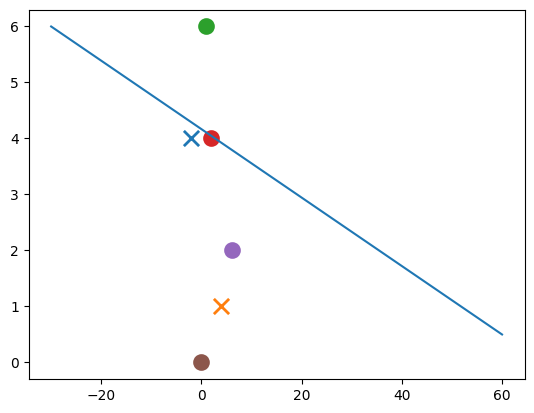

In [52]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='x', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=100, marker='o', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-30, 60], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

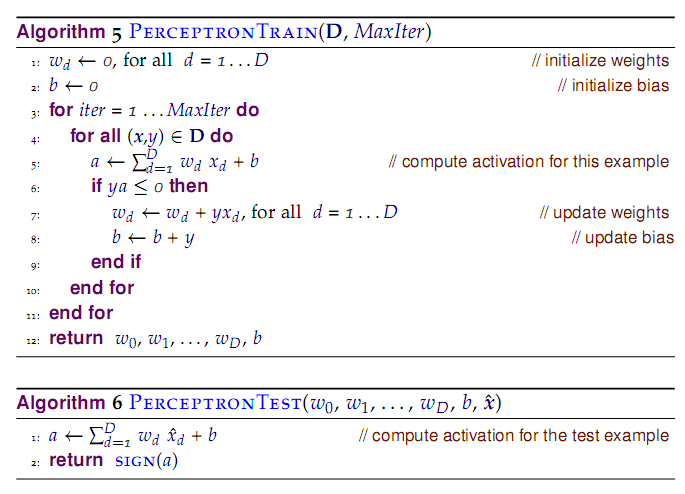

The algorithm is shown in the above image.

In [53]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 30

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [54]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

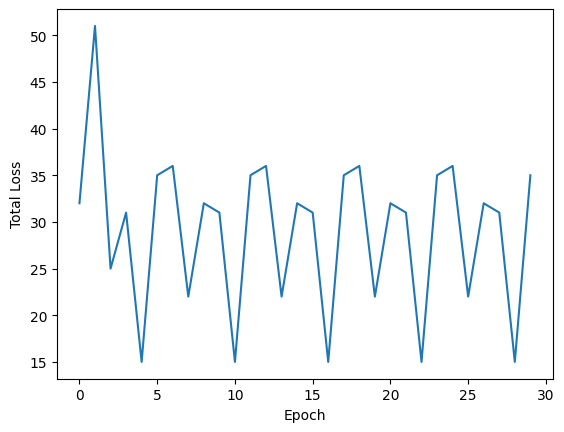

In [55]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

In [56]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

In [57]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

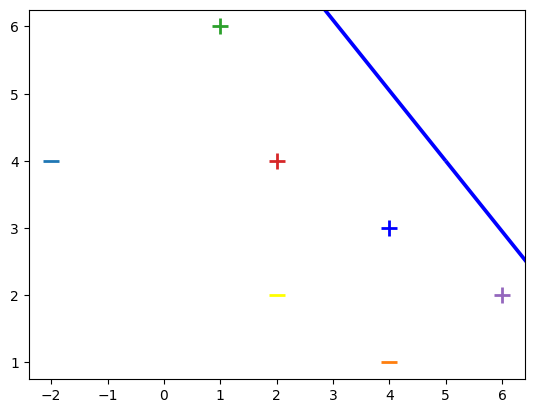

In [58]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



In [34]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [35]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


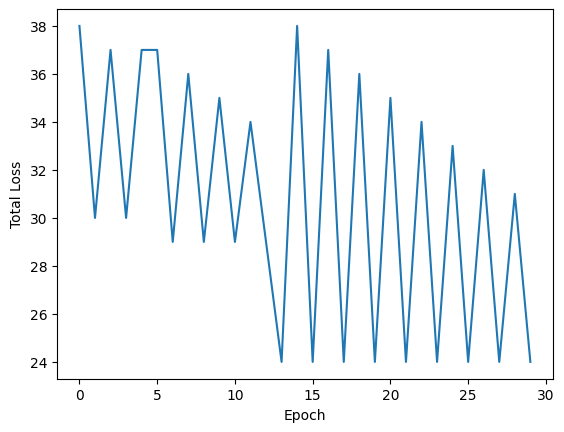

In [36]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

## **Additional Critical Thinking Questions**

1. Consider the following dataset where x = (x1, x2) ∈ {0, 1}× {0, 1}, y ∈ {−, +}. Note that this dataset is corresponding to the boolean function “AND” over the 2-bit binary input.

  Suppose we are training a Perceptron to learn on this dataset and we initialize w0 = 0 and b0 = 0.

  Please i) answer if this dataset is learnable by Perceptron, and ii) if so, write down the weights update procedure for each iteration; if not, explain why.


2. Extending AND to any boolean functions over a 2-bit binary input, where we have (2^2)^2 = 16 possible distinct boolean functions in total, among which how many of them can be learnable by a Perceptron?

  Please also write down the truth table(s) of the boolean functions that are not learnable, if there are any.

# Answer 1:

i) Learnability of the perceptron


| x₁ | x₂ | Output |
| -- | -- | ------ |
| 0  | 0  | -1     |
| 1  | 0  | -1     |
| 0  | -1  | -1    |
| 1  | 1  | 1      |

Here -1 referes to the False and +1 refers to the True

ii) Weight update procedure for perceptron



```
import numpy as np

# Define the AND dataset
# x1, x2 ∈ {0,1}; y ∈ {−1, +1} (−1 = False, +1 = True)
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([-1, -1, -1, 1])  # AND truth table

# Initialize weights and bias
w = np.array([0, 0], dtype=int)
b = 0

# Learning rate
eta = 1

# Number of epochs (max iterations)
epochs = 10

print("Initial weights:", w)
print("Initial bias:", b)
print("\nTraining...")

# Perceptron training loop
for epoch in range(epochs):
    print(f"\nEpoch {epoch + 1}")
    errors = 0
    for i in range(len(X)):
        x_i = X[i]
        y_i = y[i]
        # Compute activation
        a = np.dot(w, x_i) + b
        y_pred = 1 if a >= 0 else -1

        if y_pred != y_i:
            # Update weights and bias
            w += eta * y_i * x_i
            b += eta * y_i
            errors += 1
            print(f"Misclassified point {x_i}, label={y_i} -> Updated w={w}, b={b}")
        else:
            print(f"Correctly classified point {x_i}, label={y_i}")

    if errors == 0:
        print("\nTraining converged!")
        break

print("\nFinal weights:", w)
print("Final bias:", b)

```




#Answer 2:

Out of the 16 possible Boolean functions that can be made using two binary inputs (x₁ and x₂), only some can be learned using a basic perceptron. A perceptron is a simple type of machine learning model that draws a straight line to separate classes. So, it can only learn patterns where such a line works — this is called *linear separability*.

From these 16 functions, **10 are linearly separable**, meaning the perceptron can learn them. These include familiar functions like **AND**, **OR**, **NAND**, and **NOR**. It can also learn simple identity functions like **x₁**, **x₂**, and their opposites **NOT x₁**, **NOT x₂**. Even constant functions like **TRUE** (always gives 1) and **FALSE** (always gives 0) are learnable.

The other **6 functions**, including the popular **XOR** and **XNOR**, **cannot** be learned by a perceptron. This is because their patterns don't allow a straight line to split the input space correctly — they are *not linearly separable*.

Let’s look at the **XOR function** in truth table form:

| x₁ | x₂ | Output |
| -- | -- | ------ |
| 0  | 0  | 0      |
| 0  | 1  | 1      |
| 1  | 0  | 1      |
| 1  | 1  | 0      |

Here, the 1s are at opposite corners of the input space, so a straight line can't divide them.

The **XNOR function** flips the outputs of XOR:

| x₁ | x₂ | Output |
| -- | -- | ------ |
| 0  | 0  | 1      |
| 0  | 1  | 0      |
| 1  | 0  | 0      |
| 1  | 1  | 1      |

This pattern also can’t be split by a line, so the perceptron can't learn it.

In short, **a perceptron can learn 10 out of the 16 two-input Boolean functions**. But for the remaining 6, which include more complex patterns like XOR, it fails. This is why more advanced neural networks with multiple layers were created — to handle patterns that simple models can't.


# Perceptron training on the Banknote Dataset


In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlopen

In [60]:
#import of the library
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
column_names = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
df = pd.read_csv(url, header=None, names=column_names)

In [80]:
#preparation of the dataset
x = df[['variance','skewness']]
y = df['class'].values

In [81]:
# Convert labels 0 to -1
y = np.where(y == 0, -1, 1)

# Add bias column
# Use the feature DataFrame 'x' and convert to numpy array before hstack
X_aug = np.hstack([x.values, np.ones((x.shape[0], 1))])  # shape: (n_samples, 3)

print("X_aug shape:", X_aug.shape)

X_aug shape: (1372, 3)


In [100]:
#perceptron training
def perceptron_training(X,y,lr=0.1,epochs = 10):
  w = np.zeros(X.shape[1])
  accuracy_history = [] # To store accuracy at each epoch
  for epoch in range(epochs):
    correct_predictions = 0
    for i in range(len(X)):
      if y[i] * np.dot(w,X[i]) <= 0:
        w += lr*y[i]*X[i]
      else:
        correct_predictions += 1
    accuracy = correct_predictions / len(X)
    accuracy_history.append(accuracy)
  return w, accuracy_history # Return weights and accuracy history

In [101]:
weights = perceptron_training(X_aug, y, lr=0.1, epochs=30)
print("Final weights", weights)

Final weights (array([-0.82017001, -0.0390622 ,  2.5       ]), [0.9613702623906706, 0.9380466472303207, 0.9293002915451894, 0.9278425655976676, 0.9336734693877551, 0.9373177842565598, 0.9453352769679301, 0.9526239067055393, 0.9395043731778425, 0.9329446064139941, 0.9387755102040817, 0.9387755102040817, 0.9373177842565598, 0.9387755102040817, 0.9402332361516035, 0.9453352769679301, 0.9438775510204082, 0.9402332361516035, 0.9387755102040817, 0.9395043731778425, 0.9511661807580175, 0.9460641399416909, 0.9380466472303207, 0.9322157434402333, 0.9322157434402333, 0.9365889212827988, 0.934402332361516, 0.9329446064139941, 0.9329446064139941, 0.9322157434402333])


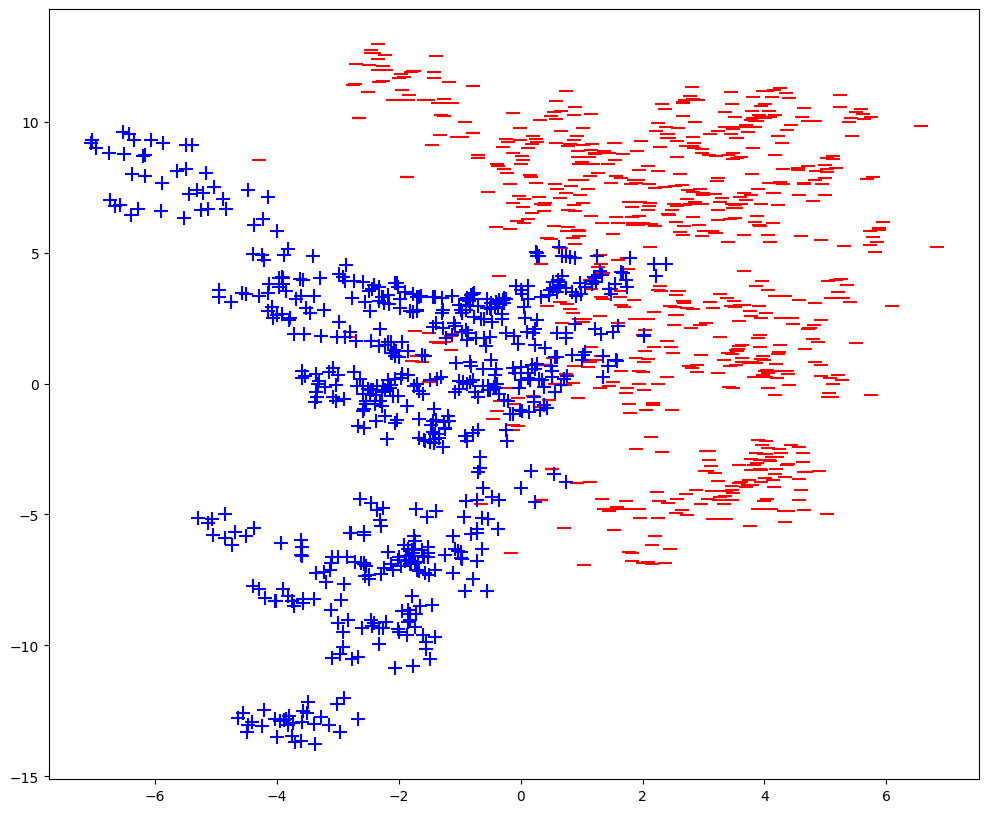

In [96]:
#Visualization
X = df[['variance', 'skewness']].values
plt.figure(figsize=(12, 10))
for i in range(len(X)):
    if y[i] == -1:
        plt.scatter(X[i, 0], X[i, 1], color='red', marker='_', s=100)
    else:
        plt.scatter(X[i, 0], X[i, 1], color='blue', marker='+', s=100)


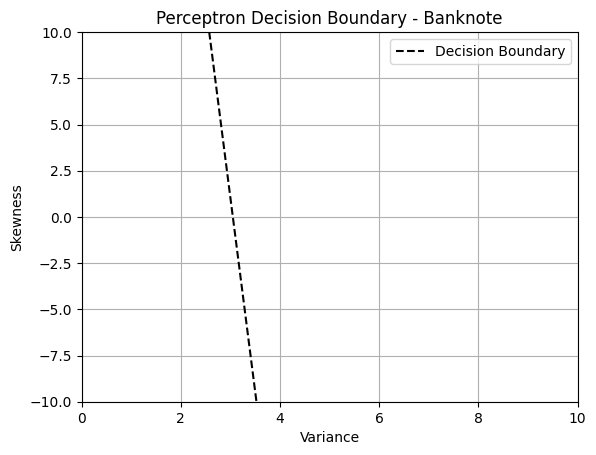

In [97]:
# Decision boundary plotting (same as before)
x_vals = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
y_vals = -(weights[0] * x_vals + weights[2]) / weights[1]
plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')

# Labels and title
plt.xlabel("Variance")
plt.ylabel("Skewness")
plt.title("Perceptron Decision Boundary - Banknote")

# ✅ Set axis limits
plt.xlim([0, 10])
plt.ylim([-10, 10])

plt.legend()
plt.grid(True)
plt.show()


In [102]:
# Retrain the perceptron and get accuracy history
weights, accuracy_history = perceptron_training(X_aug, y, lr=0.1, epochs=20)
print("Final weights:", weights)

Final weights: [-0.65767161  0.2513666   1.9       ]


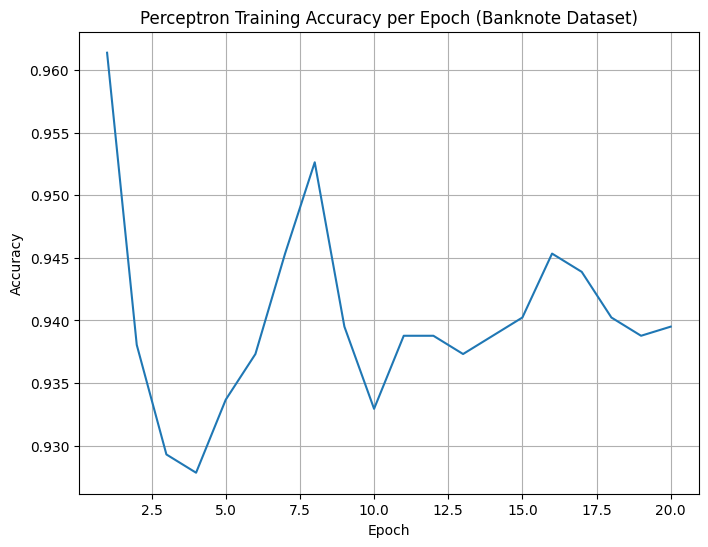

In [103]:
# Plot the accuracy curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(accuracy_history) + 1), accuracy_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Perceptron Training Accuracy per Epoch (Banknote Dataset)')
plt.grid(True)
plt.show()